## DeepDAO and API requests

Here we learn how to make API requests and we refresh a bit of plotting.

In [57]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(pd.__version__)
print(np.__version__)
print(requests.__version__)
print(plt.matplotlib.__version__)


1.2.4
1.20.1
2.25.1
3.3.4


Import authentication key.

In [58]:
# https://martin-thoma.com/configuration-files-in-python/

import json

with open("../.private/keys.json") as keys_file:
    KEYS = json.load(keys_file)

APIKEY = KEYS['DEEPDAO']
# Note: don't print the key, or if you do, delete the cell's output
# (cell outputs are saved and can be sent to Github).

DeepDao Endpoint

In [59]:
ENDPOINT = 'https://api.deepdao.io/v0.1/'

Let's create a function to communicate with the REST endpoint. 

In [60]:
def api(query, params=None, post=False):

    # https://datagy.io/python-requests-authentication/
    headers={
        'x-api-key': APIKEY,
        'accept': 'application/json'
    }

    if post:
        response = requests.post(ENDPOINT + query,
                                headers=headers,
                                json=params)
    else:
        response = requests.get(ENDPOINT + query,
                                headers=headers,
                                params=params)

    print(response)
    return response.json()


Let's try our first DeepDao query.

In [61]:
query = "ecosystem"

res = api(query)

<Response [200]>


Any response code greater than 400 indicates an error, else it is a success. See:

https://developer.mozilla.org/en-US/docs/Web/HTTP/Status

In [62]:
 res


{'data': {'totalTreasury': 9847042577.650763,
  'governanceTokenHolders': 3935144,
  'activeMembers': '697984',
  'organizationsOver1MUsd': 110,
  'organizationsOver10MUsd': 61,
  'organizationsOver100MUsd': 16,
  'organizationsOver100GovTokenHolders': 674,
  'organizationsOver1kGovTokenHolders': 202,
  'organizationsOver10kGovTokenHolders': 61,
  'totalProposals': 67479,
  'totalVotes': 3864729},
 'apiAccountMetaData': {'endpoint': 'https://api.deepdao.io/v0.1/ecosystem',
  'origin': 'DeepDAO',
  'date': '2022-09-27T13:25:24.405Z'}}

Get all DAOs in DeepDAO.

In [63]:
query = "organizations"

res = api(query)

<Response [200]>


In [64]:
res

{'data': {'totalResources': 2276,
  'resources': [{'organizationId': '8b8eab40-2728-4b71-9498-383af5bbf31d',
    'name': 'hyaliko dao',
    'description': 'DeepDAO research coming soon',
    'logo': None,
    'members': 18,
    'activeMembers': '0',
    'proposals': 3,
    'votes': 23,
    'governance': [{'platform': 'SNAPSHOT',
      'id': '9f5c01b3-c7c7-4399-9c54-2fde9f19d5ce',
      'name': 'hyaliko dao',
      'address': 'hyaliko-dao.eth'}],
    'categories': None,
    'socialResources': [{'type': 'DISCORD',
      'urls': ['https://discord.com/invite/2xvCVkAuWu']},
     {'type': 'TWITTER', 'urls': ['https://twitter.com/hyaliko']},
     {'type': 'WEBSITE', 'urls': ['https://www.hyaliko.com/']}],
    'updatedAt': '2022-09-27T03:11:25.651Z'},
   {'organizationId': '8c3057f8-d43a-4fc2-989c-a613e83c5b52',
    'name': 'Bao Finance',
    'description': 'Bao Finance is a community-run project aiming to build a decentralized, open platform for synthetics linked to any data. Tokenizing data 

Save the list for future reference.

In [65]:
df = pd.DataFrame(res['data']['resources'])
df.to_json("data/daos_deepdao.json", orient="records")

## Visually explore the saved file.
# Is it a mess? Prettify it with VS Code auto-formatter. 
# Don't you remember the shorcut? Check our python_warmup lecture.

#### Example: fetch data, insert into data frame, clean it, and plot it.

Treasuries by chain.

In [66]:
query = "ecosystem/chains_treasury_breakdown"

res = api(query)



<Response [200]>


In [67]:
res

{'data': {'1': {'chainId': '1',
   'chainName': 'Ethereum',
   'totalNumberOfOrganizations': '206',
   'totalNumberOfProposals': '16,367',
   'totalNumberOfVotes': '1,247,749',
   'totalNumberofTreasuries': '374',
   'totalTreasuriesUsdValue': '9,003,512,393',
   'totalNumberOfTokenHolders': '1,461,141'},
  '30': {'chainId': '30',
   'chainName': 'RSK',
   'totalNumberOfOrganizations': '1',
   'totalNumberOfProposals': '5',
   'totalNumberOfVotes': '65',
   'totalNumberofTreasuries': '1',
   'totalTreasuriesUsdValue': 'N/A',
   'totalNumberOfTokenHolders': '208'},
  '100': {'chainId': '100',
   'chainName': 'Gnosis Chain (formerly xDai)',
   'totalNumberOfOrganizations': '11',
   'totalNumberOfProposals': '2,370',
   'totalNumberOfVotes': '5,348',
   'totalNumberofTreasuries': '22',
   'totalTreasuriesUsdValue': '61,235,404',
   'totalNumberOfTokenHolders': '835'},
  '137': {'chainId': '137',
   'chainName': 'Polygon',
   'totalNumberOfOrganizations': '8',
   'totalNumberOfProposals': 

Convert the result into a data frame for easier plotting.

In [68]:
df = pd.DataFrame()

for d in res['data']:
    df = df.append(res['data'][d], ignore_index=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   chainId                     8 non-null      object
 1   chainName                   9 non-null      object
 2   totalNumberOfOrganizations  9 non-null      object
 3   totalNumberOfProposals      9 non-null      object
 4   totalNumberOfTokenHolders   9 non-null      object
 5   totalNumberOfVotes          9 non-null      object
 6   totalNumberofTreasuries     9 non-null      object
 7   totalTreasuriesUsdValue     9 non-null      object
dtypes: object(8)
memory usage: 704.0+ bytes


Shorten column names.

In [69]:
df.columns = [
    'chainId', 'chainName', 'orgs', 'props', 'votes', 'treas', 'usd', 'holders'
]

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   chainId    8 non-null      object
 1   chainName  9 non-null      object
 2   orgs       9 non-null      object
 3   props      9 non-null      object
 4   votes      9 non-null      object
 5   treas      9 non-null      object
 6   usd        9 non-null      object
 7   holders    9 non-null      object
dtypes: object(8)
memory usage: 704.0+ bytes


Format data.

In [70]:
def cleanData(x):
    return 0 if x == 'N/A' else x.replace(',', '')
    
int_columns = ['orgs', 'props', 'votes', 'treas', 'usd', 'holders']
for col in int_columns:
    # print(col)
    # df[col] = df[col].apply(lambda x : x.replace(',', ''))
    df[col] = df[col].apply(cleanData)


In [71]:
df['orgs'] = df['orgs'].astype('float')
df['props'] = df['props'].astype('float')
df['votes'] = df['votes'].astype('float')
df['treas'] = df['treas'].astype('float')
df['usd'] = df['usd'].astype('float')
df['holders'] = df['holders'].astype('float')



In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   chainId    8 non-null      object 
 1   chainName  9 non-null      object 
 2   orgs       9 non-null      float64
 3   props      9 non-null      float64
 4   votes      9 non-null      float64
 5   treas      9 non-null      float64
 6   usd        9 non-null      float64
 7   holders    9 non-null      float64
dtypes: float64(6), object(2)
memory usage: 704.0+ bytes


Plot it.

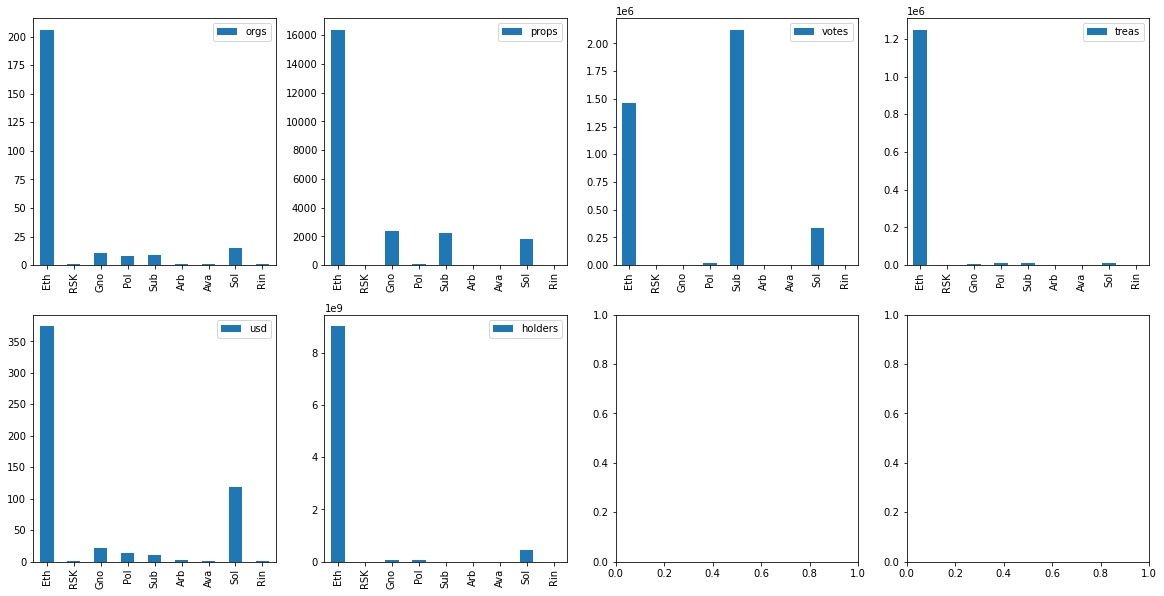

In [73]:
import matplotlib.pyplot as plt

df['chain'] = df['chainName'].apply(lambda x : x[0:3])
df = df.set_index(df['chain'])


fig, axes = plt.subplots(nrows=2, ncols=4)

counter = 0
for c in int_columns:
    x = 0 if counter < 4 else 1 
    y = counter % 4
    # print(c, x, y)
    ax = df[["chain", c]].plot.bar(x="chain", y=c, ax=axes[x,y], figsize=(20,10))
    # ax.set_title(c)
    ax.set_xlabel('')
    counter += 1


More compact (but with less control).

array([<AxesSubplot:ylabel='orgs'>, <AxesSubplot:ylabel='props'>,
       <AxesSubplot:ylabel='votes'>, <AxesSubplot:ylabel='treas'>,
       <AxesSubplot:ylabel='usd'>, <AxesSubplot:ylabel='holders'>],
      dtype=object)

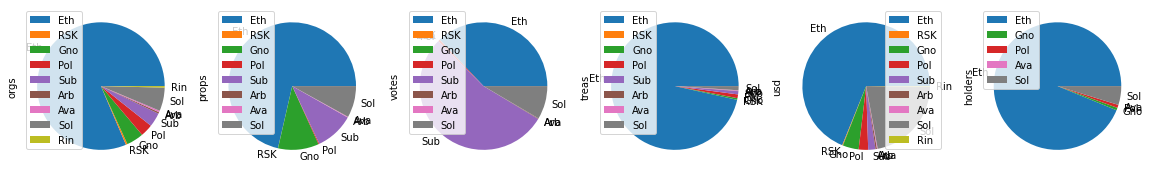

In [74]:
df[int_columns].plot.pie(subplots=True, figsize=(20,10))


#### A few more queries...

In [75]:
query = "ecosystem/gov_platforms"
res = api(query)

<Response [200]>


In [76]:
res

{'data': [{'platformId': 1, 'platformTitle': 'DAOstack'},
  {'platformId': 2, 'platformTitle': 'Moloch / Daohaus'},
  {'platformId': 3, 'platformTitle': 'OpenLaw'},
  {'platformId': 4, 'platformTitle': 'Aragon'},
  {'platformId': 5, 'platformTitle': 'Colony'},
  {'platformId': -1, 'platformTitle': 'AssetsOnly'},
  {'platformId': 11, 'platformTitle': 'snapshot'},
  {'platformId': 12, 'platformTitle': 'Safe/Snapshot'},
  {'platformId': 6, 'platformTitle': 'Compound'},
  {'platformId': 14, 'platformTitle': 'Realms'},
  {'platformId': 15, 'platformTitle': 'Substrate'}],
 'apiAccountMetaData': {'endpoint': 'https://api.deepdao.io/v0.1/ecosystem/gov_platforms',
  'origin': 'DeepDAO',
  'date': '2022-09-27T13:25:59.987Z'}}

In [77]:
query = "proposals/active_proposals"
res = api(query, { 'page': 1 })

<Response [200]>


In [78]:
res

[{'organizationId': 'da9956dc-8a87-40c0-a066-b8991d67e574',
  'platform': 'SNAPSHOT',
  'title': 'Become a tenant in the Bloktopia VR metaverse',
  'description': 'It would be awesome to see pancakeswap become a tenant in the new vr/ar bloktopia metaverse. The metaverse launches in Q1 of 2022. They already have tons of big name crypto projects as tenants. So it only makes since that pancakeswap would become one to.',
  'proposer': '0x3ec827d4c56652b826a6cfb38257b3fd17b36922',
  'proposalCreatedAt': '2021-11-13T21:35:10.000Z',
  'proposalNativeId': 'QmUcyAf7HBBWcwDiNjFkwFSTwD2ZKz9s8XiLatqEFMbx8z',
  'endedAt': '2028-03-13T07:00:00.000Z',
  'status': 'ACTIVE',
  'totalVotes': '4460',
  'choicesMappedToScores': {'No': 80.37818281200475,
   'YES': 1784.7343290008275},
  'proposalUrl': 'https://deepdao.io/feed-proposal/QmUcyAf7HBBWcwDiNjFkwFSTwD2ZKz9s8XiLatqEFMbx8z',
  'proposerProfilePageUrl': 'https://deepdao.io/user/0x3ec827d4c56652b826a6cfb38257b3fd17b36922/verified_dao_experience'},
 {

#### Time Series

In [79]:
query = "timeseries/daily_proposals"
params = {
    'platforms': "11",
    'startDate': "2018-01-01",
    'endDate': "2022-09-01",
}
res = api(query, params)


<Response [200]>


In [80]:
res

[{'date': '2022-09-01', 'counter': 36},
 {'date': '2022-08-31', 'counter': 57},
 {'date': '2022-08-30', 'counter': 43},
 {'date': '2022-08-29', 'counter': 56},
 {'date': '2022-08-28', 'counter': 20},
 {'date': '2022-08-27', 'counter': 35},
 {'date': '2022-08-26', 'counter': 31},
 {'date': '2022-08-25', 'counter': 37},
 {'date': '2022-08-24', 'counter': 37},
 {'date': '2022-08-23', 'counter': 32},
 {'date': '2022-08-22', 'counter': 53},
 {'date': '2022-08-21', 'counter': 15},
 {'date': '2022-08-20', 'counter': 15},
 {'date': '2022-08-19', 'counter': 42},
 {'date': '2022-08-18', 'counter': 46},
 {'date': '2022-08-17', 'counter': 53},
 {'date': '2022-08-16', 'counter': 48},
 {'date': '2022-08-15', 'counter': 59},
 {'date': '2022-08-14', 'counter': 17},
 {'date': '2022-08-13', 'counter': 25},
 {'date': '2022-08-12', 'counter': 25},
 {'date': '2022-08-11', 'counter': 36},
 {'date': '2022-08-10', 'counter': 48},
 {'date': '2022-08-09', 'counter': 65},
 {'date': '2022-08-08', 'counter': 35},


In [81]:
df = pd.DataFrame(res)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')


In [82]:
df.info()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 738 entries, 2022-09-01 to 2020-08-24
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   counter  738 non-null    int64
dtypes: int64(1)
memory usage: 11.5 KB


<AxesSubplot:>

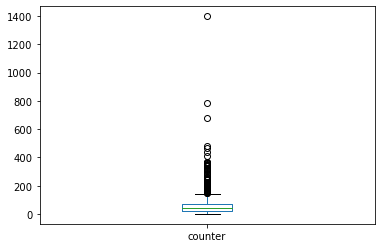

In [83]:
df.plot.box()


<AxesSubplot:xlabel='date'>

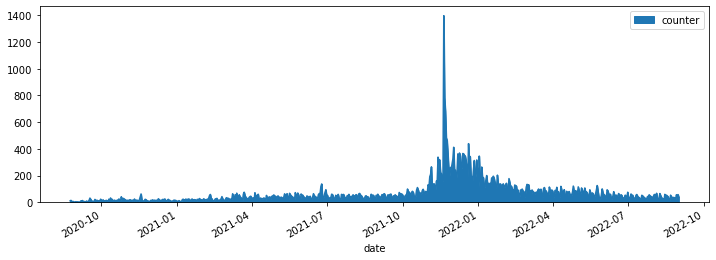

In [84]:
df.plot.area(figsize=(12, 4))


<AxesSubplot:ylabel='Density'>

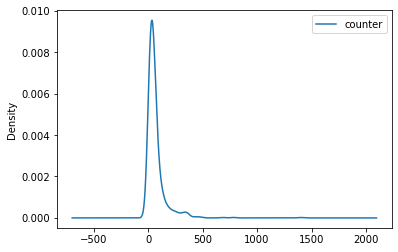

In [85]:
df.plot.density()

<AxesSubplot:ylabel='Frequency'>

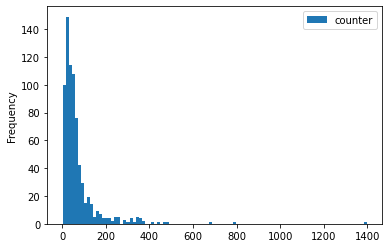

In [86]:
df.plot.hist(bins=100)

<AxesSubplot:xlabel='date'>

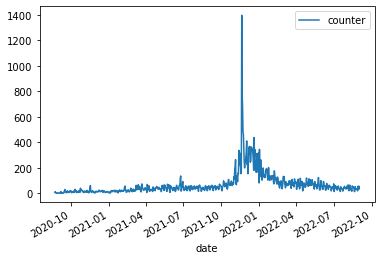

In [87]:
df.plot.line()

## Badger DAO

In [88]:
badgerDAO = "fe4cd05c-f6cb-461a-add9-bcdb1365fc0e"


In [89]:
query = "timeseries/daily_dao_proposals/" + badgerDAO

params = { 
    'startDate': "2018-01-01",
    'endDate': "2022-09-01",
}

res = api(query, params)

<Response [200]>


In [90]:
len(res)

78

In [91]:
res

[{'date': '2022-08-16', 'counter': 1},
 {'date': '2022-08-01', 'counter': 1},
 {'date': '2022-07-06', 'counter': 2},
 {'date': '2022-06-28', 'counter': 2},
 {'date': '2022-05-02', 'counter': 1},
 {'date': '2022-04-27', 'counter': 1},
 {'date': '2022-04-20', 'counter': 1},
 {'date': '2022-03-28', 'counter': 2},
 {'date': '2022-03-17', 'counter': 1},
 {'date': '2022-02-04', 'counter': 1},
 {'date': '2022-01-18', 'counter': 1},
 {'date': '2022-01-05', 'counter': 2},
 {'date': '2022-01-04', 'counter': 1},
 {'date': '2021-12-29', 'counter': 1},
 {'date': '2021-12-27', 'counter': 2},
 {'date': '2021-12-18', 'counter': 1},
 {'date': '2021-12-17', 'counter': 1},
 {'date': '2021-12-15', 'counter': 1},
 {'date': '2021-12-14', 'counter': 1},
 {'date': '2021-12-11', 'counter': 1},
 {'date': '2021-11-14', 'counter': 1},
 {'date': '2021-11-08', 'counter': 1},
 {'date': '2021-11-03', 'counter': 1},
 {'date': '2021-10-28', 'counter': 1},
 {'date': '2021-10-22', 'counter': 1},
 {'date': '2021-10-18', '

<AxesSubplot:xlabel='date'>

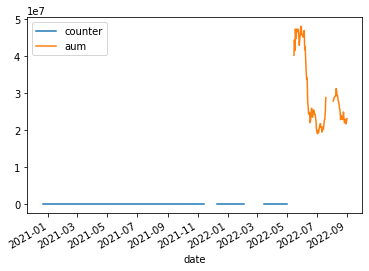

In [92]:
df_badger.plot()

In [93]:
df_badger = pd.DataFrame(res)
df_badger['date'] = pd.to_datetime(df_badger['date'])
df_badger = df_badger.set_index('date')
df_badger.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78 entries, 2022-08-16 to 2020-12-20
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   counter  78 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [94]:
df_badger.describe()

,counter
count,78.000000
mean,1.743590
std,1.678248
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,10.000000


In [95]:
df_badger[df_badger['counter'] == df_badger['counter'].max()]

,counter
date,
2021-02-24,10


In [96]:
query = "timeseries/daily_dao_treasury/" + badgerDAO

params = { 
    'startDate': "2018-01-01",
    'endDate': "2022-09-01",
}

res = api(query, params)
len(res)

<Response [200]>


7

In [97]:
res

{'total': [{'date': '2022-09-01', 'aum': 23080659.369379885},
  {'date': '2022-08-31', 'aum': 22253743.980534416},
  {'date': '2022-08-30', 'aum': 21694949.31822275},
  {'date': '2022-08-29', 'aum': 22932966.41679944},
  {'date': '2022-08-28', 'aum': 22157716.427223794},
  {'date': '2022-08-27', 'aum': 21965304.21088102},
  {'date': '2022-08-26', 'aum': 23000876.83088723},
  {'date': '2022-08-25', 'aum': 24891915.48193446},
  {'date': '2022-08-24', 'aum': 23289274.544821322},
  {'date': '2022-08-23', 'aum': 22853639.471773814},
  {'date': '2022-08-22', 'aum': 22938338.66364345},
  {'date': '2022-08-21', 'aum': 23863228.59694742},
  {'date': '2022-08-20', 'aum': 22962467.363073893},
  {'date': '2022-08-19', 'aum': 22819990.37766436},
  {'date': '2022-08-18', 'aum': 25321818.222860154},
  {'date': '2022-08-17', 'aum': 25683052.526528332},
  {'date': '2022-08-16', 'aum': 26943271.477129795},
  {'date': '2022-08-15', 'aum': 27733576.80739295},
  {'date': '2022-08-14', 'aum': 27903487.92577

In [98]:
df_badger_treasury = pd.DataFrame(res['liquid'])
df_badger_treasury['date'] = pd.to_datetime(df_badger_treasury['date'])
df_badger_treasury = df_badger_treasury.set_index('date')
df_badger_treasury.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98 entries, 2022-09-01 to 2021-12-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   aum     98 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


<AxesSubplot:xlabel='date'>

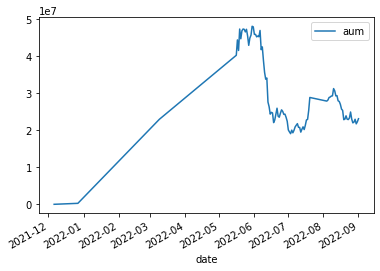

In [99]:
df_badger_treasury.plot()

In [100]:
df_badger = df_badger.join(df_badger_treasury, how="outer")

In [101]:
df_badger.head()

,counter,aum
date,,
2020-12-20,2.0,NaN
2020-12-23,1.0,NaN
2020-12-27,1.0,NaN
2020-12-30,1.0,NaN
2021-01-04,1.0,NaN


In [102]:
df_badger.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172 entries, 2020-12-20 to 2022-09-01
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   counter  78 non-null     float64
 1   aum      98 non-null     float64
dtypes: float64(2)
memory usage: 4.0 KB


In [103]:
df
df.plot(x=df.index, y=["counter", "aum"])

KeyError: "None of [DatetimeIndex(['2022-09-01', '2022-08-31', '2022-08-30', '2022-08-29',\n               '2022-08-28', '2022-08-27', '2022-08-26', '2022-08-25',\n               '2022-08-24', '2022-08-23',\n               ...\n               '2020-09-02', '2020-09-01', '2020-08-31', '2020-08-30',\n               '2020-08-29', '2020-08-28', '2020-08-27', '2020-08-26',\n               '2020-08-25', '2020-08-24'],\n              dtype='datetime64[ns]', name='date', length=738, freq=None)] are in the [columns]"